In [1]:
import pandas as pd

In [2]:
# l_orderkey, l_partkey, l_suppkey, l_linenumber, l_quantity: decimal(12,2) (nullable = true)
#     // |-- l_extendedprice: decimal(12,2) (nullable = true)
#     // |-- l_discount: decimal(12,2) (nullable = true)
#     // |-- l_tax: decimal(12,2) (nullable = true)
#     // |-- l_returnflag: string (nullable = true)
#     // |-- l_linestatus: string (nullable = true)
#     // |-- l_shipdate: date (nullable = true)
#     // |-- l_commitdate: date (nullable = true)
#     // |-- l_receiptdate: date (nullable = true)
#     // |-- l_shipinstruct: string (nullable = true)
#     // |-- l_shipmode: string (nullable = true)
#     // |-- l_comment:

In [3]:
lineitem = pd.read_csv("lineitem.tbl", sep='|', index_col=False, 
            names=['l_orderkey', 'l_partkey', 'l_suppkey', 'l_linenumber', 'l_quantity', 
                 'l_extendedprice', 'l_discount', 'l_tax', 'l_returnflag', 'l_linestatus',
                'l_shipdate', 'l_commitdate', 'l_receiptdate', 'l_shipinstruct', 'l_shipmode',
                'l_comment'])

In [4]:
lineitem.head()

,l_orderkey,l_partkey,l_suppkey,l_linenumber,l_quantity,l_extendedprice,l_discount,l_tax,l_returnflag,l_linestatus,l_shipdate,l_commitdate,l_receiptdate,l_shipinstruct,l_shipmode,l_comment
0,1,15519,785,1,17,24386.67,0.04,0.02,N,O,1996-03-13,1996-02-12,1996-03-22,DELIVER IN PERSON,TRUCK,egular courts above the
1,1,6731,732,2,36,58958.28,0.09,0.06,N,O,1996-04-12,1996-02-28,1996-04-20,TAKE BACK RETURN,MAIL,ly final dependencies: slyly bold
2,1,6370,371,3,8,10210.96,0.10,0.02,N,O,1996-01-29,1996-03-05,1996-01-31,TAKE BACK RETURN,REG AIR,"riously. regular, express dep"
3,1,214,465,4,28,31197.88,0.09,0.06,N,O,1996-04-21,1996-03-30,1996-05-16,NONE,AIR,lites. fluffily even de
4,1,2403,160,5,24,31329.60,0.10,0.04,N,O,1996-03-30,1996-03-14,1996-04-01,NONE,FOB,pending foxes. slyly re


In [5]:
lineitem.dtypes

l_orderkey           int64
l_partkey            int64
l_suppkey            int64
l_linenumber         int64
l_quantity           int64
l_extendedprice    float64
l_discount         float64
l_tax              float64
l_returnflag        object
l_linestatus        object
l_shipdate          object
l_commitdate        object
l_receiptdate       object
l_shipinstruct      object
l_shipmode          object
l_comment           object
dtype: object

In [36]:
lineitem.shape

(600572, 16)

In [42]:
for col in sorted(lineitem.columns): # quantity, discount, shipmode
    print(col, lineitem[col].nunique())

l_comment 538684
l_commitdate 2466
l_discount 11
l_extendedprice 130792
l_linenumber 7
l_linestatus 2
l_orderkey 150000
l_partkey 20000
l_quantity 50
l_receiptdate 2547
l_returnflag 3
l_shipdate 2525
l_shipinstruct 4
l_shipmode 7
l_suppkey 1000
l_tax 9


In [40]:
lineitem.groupby(['l_commitdate', 'l_receiptdate']).ngroups

301692

In [45]:
lineitem.groupby(['l_orderkey', 'l_suppkey']).ngroups

599389

In [47]:
lineitem.groupby(['l_orderkey', 'l_partkey', 'l_suppkey']).ngroups

600555

In [49]:
lineitem.groupby(["l_shipdate", "l_returnflag", "l_linestatus"]).ngroups

3815

In [101]:
lines = [
'l_shipdate l_returnflag l_linestatus',
'l_orderkey l_shipdate',
'l_orderkey l_suppkey',
'l_shipdate l_discount l_quantity',
'l_orderkey l_suppkey l_shipdate',
'l_orderkey l_suppkey l_partkey',
'l_orderkey l_returnflag',
'l_orderkey l_shipmode l_commitdate',
'l_receiptdate l_shipdate',
'l_partkey l_quantity',
'l_orderkey l_quantity',
'l_partkey l_quantity l_shipmode l_shipinstruct',
'l_partkey l_suppkey l_shipdate']

In [ ]:
lines2 = [
'l_shipdate l_returnflag',
'l_orderkey l_shipdate',
'l_orderkey l_suppkey',
'l_shipdate l_discount l_quantity',
'l_orderkey l_suppkey l_shipdate',
'l_orderkey l_suppkey l_partkey',
'l_orderkey l_returnflag',
'l_orderkey l_shipmode l_commitdate',
'l_receiptdate l_shipdate',
'l_partkey l_quantity',
'l_orderkey l_quantity',
'l_partkey l_quantity l_shipmode l_shipinstruct',
'l_partkey l_suppkey l_shipdate']

In [52]:
for line in lines:
    l = line.split()
    ngroup = lineitem.groupby(l).ngroups
    print(line, ngroup, ngroup/lineitem.shape[0] * 100) 

l_shipdate l_returnflag l_linestatus 3815 0.6352277495454334
l_orderkey l_shipdate 590847 98.38071038942874
l_orderkey l_suppkey 599389 99.80302111986573
l_shipdate l_discount l_quantity 484297 80.63929054301566
l_orderkey l_suppkey l_shipdate 600564 99.99866793656714
l_orderkey l_suppkey l_partkey 600555 99.99716936520517
l_orderkey l_returnflag 207165 34.49461513357266
l_orderkey l_shipmode l_commitdate 597830 99.543435258387
l_receiptdate l_shipdate 74920 12.474774048740201
l_partkey l_quantity 451511 75.1801615792944
l_orderkey l_quantity 576993 96.07390953957228
l_partkey l_quantity l_shipmode l_shipinstruct 594076 98.91836449251713
l_partkey l_suppkey l_shipdate 599651 99.8466461972919


In [38]:
for col in lineitem.columns:
    print(col, lineitem[col].value_counts())

l_orderkey 501411    7
350401    7
352325    7
191970    7
41831     7
413856    7
485511    7
284770    7
481409    7
33635     7
35682     7
581284    7
20576     7
107335    7
392960    7
86080     7
109382    7
384772    7
113476    7
147490    7
153633    7
151584    7
223239    7
348352    7
346176    7
219137    7
555365    7
85697     7
344770    7
521537    7
         ..
200387    1
326914    1
75398     1
73345     1
465569    1
200551    1
206085    1
256992    1
2210      1
73863     1
67714     1
209444    1
69761     1
205350    1
207399    1
27429     1
401511    1
201987    1
2627      1
197889    1
407652    1
19233     1
125856    1
469062    1
208739    1
78436     1
460866    1
202596    1
537703    1
551392    1
Name: l_orderkey, Length: 150000, dtype: int64
l_partkey 10620    56
6140     54
8051     52
15584    52
10597    51
2292     51
10715    51
3225     50
17670    50
14422    50
19444    50
9357     49
15215    49
16348    49
2537     49
8554     49
11356   

l_comment  carefully                                     98
 furiously                                     92
 carefully                                     92
carefully                                      91
 furiously                                     86
furiously                                      70
ly regular                                     62
 blithely                                      61
y regular                                      58
 accounts                                      48
 deposits                                      47
e furiousl                                     47
e carefully                                    46
ly regular                                     46
 requests                                      44
ly ironic                                      44
 packages                                      44
pinto bean                                     40
e carefull                                     39
 theodolite                             

In [23]:
lineitem['l_returnflag'].apply(lambda x: str(x)).value_counts()

N    304481
R    148301
A    147790
Name: l_returnflag, dtype: int64

In [24]:
lineitem['l_linestatus'].apply(lambda x: str(x)).value_counts()

O    300716
F    299856
Name: l_linestatus, dtype: int64

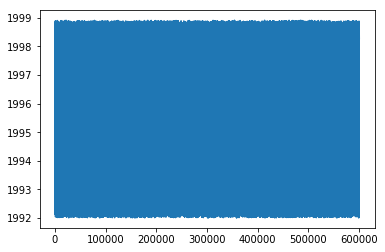

In [104]:
pd.to_datetime(lineitem['l_shipdate']).plot()

In [ ]:
lineitem['l_shipdate'].value_counts().to_frame(name='count').head()

In [ ]:
col = 'l_orderkey'
lineitem[[col]].plot.hist(bins=len(lineitem[col].value_counts()))

In [6]:
for col in lineitem.columns:
    try:
        lineitem[[col]].plot.hist(bins=lineitem[col].max())
    except:
        print("Cannot plot column {}".format(col))

Cannot plot column l_orderkey
Cannot plot column l_extendedprice
Cannot plot column l_discount
Cannot plot column l_tax
Cannot plot column l_returnflag
Cannot plot column l_linestatus
Cannot plot column l_shipdate
Cannot plot column l_commitdate
Cannot plot column l_receiptdate
Cannot plot column l_shipinstruct
Cannot plot column l_shipmode
Cannot plot column l_comment


In [55]:
lineitem['l_returnflag'].apply(lambda x: str(x)).value_counts()

N    304481
R    148301
A    147790
Name: l_returnflag, dtype: int64

In [57]:
lineitem.describe()

,l_orderkey,l_partkey,l_suppkey,l_linenumber,l_quantity,l_extendedprice,l_discount,l_tax
count,600572.000000,600572.000000,600572.000000,600572.000000,600572.000000,600572.000000,600572.000000,600572.000000
mean,300087.320326,10003.995747,500.555334,3.001216,25.533661,35992.236202,0.050074,0.040042
std,173380.159545,5768.962517,288.555763,1.732117,14.420189,22014.181750,0.031603,0.025797
min,1.000000,1.000000,1.000000,1.000000,1.000000,901.000000,0.000000,0.000000
25%,149734.000000,5012.000000,250.000000,2.000000,13.000000,17594.380000,0.020000,0.020000
50%,300486.000000,10003.000000,501.000000,3.000000,26.000000,34461.750000,0.050000,0.040000
75%,450593.250000,14998.000000,750.000000,4.000000,38.000000,51684.300000,0.080000,0.060000
max,600000.000000,20000.000000,1000.000000,7.000000,50.000000,95949.500000,0.100000,0.080000


In [23]:
sizes = lineitem.groupby(['l_shipdate', 'l_returnflag', 'l_linestatus']).size().values

In [17]:
grs = lineitem.groupby(['l_shipdate', 'l_returnflag', 'l_linestatus'])

In [18]:
gr_keys = list(grs.groups.keys())

In [38]:
stds = []
for key in gr_keys:
    stds.append(np.float64(grs.get_group(key)['l_extendedprice'].std()))

In [39]:
type(stds[0])

numpy.float64

In [40]:
import numpy as np

In [41]:
s = 0
for size, stdd in zip(sizes, stds):
    s+= 1.0/np.float64(2.0) * size**2 * stdd**2

In [42]:
s**(0.5) * 1.96

321599004.02440906

In [92]:
s = 0
std = 22014.181750
for size, stdd in zip(sizes, stds):
    s += size * stdd**2

In [95]:
s**(0.5) * 1.96

33442887.345974628

In [9]:
lineitem['l_extendedprice'].sum() * 0.1

2161592928.024001

In [15]:
lineitem['l_extendedprice'].mean() * 0.1

3599.2236201889496

In [14]:
lineitem.groupby(['l_shipdate', 'l_returnflag', 'l_linestatus']).apply(lambda x: x.sample(frac=0.3))


AttributeError: Cannot access callable attribute 'reset_index' of 'SeriesGroupBy' objects, try using the 'apply' method